# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import datetime
import pytemperature
# not a standard library: pip install pytemperature

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# not a standard library: pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# now
now = datetime.datetime.now()

## Generate Cities List

In [136]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [137]:
# API used: https://openweathermap.org/api

# by coordinates: api.openweathermap.org/data/2.5/weather?lat=35&lon=139
# by city name: api.openweathermap.org/data/2.5/weather?q=London

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# variables
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

count = 1

# query_url = url + "appid=" + api_key + "&q=" + city #to do
generic_weather_url = url + "appid=" + 'c695b8706d2f4a9452e480866f415a34' + "&q="
pp = pprint.PrettyPrinter(indent=4)

# functionality
print(f'\033[4m' 'Beginning Data Retrieval' '\033[0m') # status update while processing
for count, city in enumerate(cities, start=1):
#     Build query URL 
    query_url = generic_weather_url + city
#     Get weather data
    print(f'Processing Record {count} of Set 1 | {city}')
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json['cod'] != 200:
        print(f'City not found. Skipping...')
    else: #include in our dataset
#         pp.pprint(weather_json)
        humidity = float(weather_json['main']['humidity'])
        if humidity <= 100:  #humidity can not be above 100 percent
            City.append(weather_json['name'])
            Cloudiness.append(weather_json['clouds']['all'])
            Country.append(weather_json['sys']['country'])
            Date.append(weather_json['dt'])
            Humidity.append(weather_json['main']['humidity'])
            Lat.append(weather_json['coord']['lat'])
            Lng.append(weather_json['coord']['lon'])
            Max_Temp.append(pytemperature.k2f(weather_json['main']['temp_max']))
            Wind_Speed.append(weather_json['wind']['speed'])     

Beginning Data Retrieval
Processing Record 1 of Set 1 | qasigiannguit
Processing Record 2 of Set 1 | sistranda
Processing Record 3 of Set 1 | sarkand
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | nishihara
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | artyk
City not found. Skipping...
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | khani
Processing Record 22 of Set 1 | marawi
Processing Record 23 of Set 1 | samusu
City not fo

Processing Record 185 of Set 1 | fort stewart
Processing Record 186 of Set 1 | mosquera
Processing Record 187 of Set 1 | sisophon
Processing Record 188 of Set 1 | russell
Processing Record 189 of Set 1 | bathsheba
Processing Record 190 of Set 1 | provideniya
Processing Record 191 of Set 1 | santa rosa
Processing Record 192 of Set 1 | victoria
Processing Record 193 of Set 1 | anadyr
Processing Record 194 of Set 1 | kodiak
Processing Record 195 of Set 1 | jinchang
Processing Record 196 of Set 1 | douglas
Processing Record 197 of Set 1 | west bay
Processing Record 198 of Set 1 | catabola
Processing Record 199 of Set 1 | port-cartier
Processing Record 200 of Set 1 | dingle
Processing Record 201 of Set 1 | conceicao do araguaia
Processing Record 202 of Set 1 | sadao
Processing Record 203 of Set 1 | san cristobal
Processing Record 204 of Set 1 | ravar
Processing Record 205 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 206 of Set 1 | lethem
Processing Record 207 of Set 1

Processing Record 364 of Set 1 | ocampo
Processing Record 365 of Set 1 | general roca
Processing Record 366 of Set 1 | balsas
Processing Record 367 of Set 1 | phan thiet
Processing Record 368 of Set 1 | bolshegrivskoye
City not found. Skipping...
Processing Record 369 of Set 1 | adrar
Processing Record 370 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 371 of Set 1 | kirksville
Processing Record 372 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 373 of Set 1 | haines junction
Processing Record 374 of Set 1 | guaira
Processing Record 375 of Set 1 | gritsovskiy
Processing Record 376 of Set 1 | lavrentiya
Processing Record 377 of Set 1 | kirkwall
Processing Record 378 of Set 1 | coquimbo
Processing Record 379 of Set 1 | daru
Processing Record 380 of Set 1 | great yarmouth
Processing Record 381 of Set 1 | cap malheureux
Processing Record 382 of Set 1 | sao mateus
Processing Record 383 of Set 1 | topeka
Processing Record 384 of Set 1 | rocha
Processing

Processing Record 546 of Set 1 | flinders
Processing Record 547 of Set 1 | cayenne
Processing Record 548 of Set 1 | marang
City not found. Skipping...
Processing Record 549 of Set 1 | veseloyarsk
Processing Record 550 of Set 1 | zalantun
Processing Record 551 of Set 1 | morondava
Processing Record 552 of Set 1 | acapetahua
City not found. Skipping...
Processing Record 553 of Set 1 | hvide sande
Processing Record 554 of Set 1 | bacalar
Processing Record 555 of Set 1 | ahumada
City not found. Skipping...
Processing Record 556 of Set 1 | rizhao
Processing Record 557 of Set 1 | san jose
Processing Record 558 of Set 1 | bunbury
Processing Record 559 of Set 1 | tahoua
Processing Record 560 of Set 1 | coxim
Processing Record 561 of Set 1 | luau
Processing Record 562 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 563 of Set 1 | muros
Processing Record 564 of Set 1 | acarau
City not found. Skipping...
Processing Record 565 of Set 1 | neiafu
Processing Record 566 of Set 1 | abha
Processi

In [138]:
# build the dataframe
city_weather_dict = {
    'City':          City,
    'Cloudiness':    Cloudiness,
    'Country':       Country,
    'Date':          Date,
    'Humidity':      Humidity,
    'Lat':           Lat,
    'Lng':           Lng,
    'Max Temp':      Max_Temp,
    'Wind Speed':    Wind_Speed    
}
city_weather_data = pd.DataFrame(city_weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [139]:
city_weather_data.to_csv('WeatherPy.csv',index=False)
city_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
City          546 non-null object
Cloudiness    546 non-null int64
Country       546 non-null object
Date          546 non-null int64
Humidity      546 non-null int64
Lat           546 non-null float64
Lng           546 non-null float64
Max Temp      546 non-null float64
Wind Speed    546 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.5+ KB


In [140]:
city_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qasigiannguit,32,GL,1552513800,54,68.82,-51.19,4.98,5.10
1,Sistranda,90,NO,1552517166,97,63.73,8.83,32.99,5.70
2,Sarkand,0,KZ,1552517288,57,45.41,79.91,16.51,1.02
3,Bredasdorp,92,ZA,1552516273,93,-34.53,20.04,65.98,1.17
4,Jamestown,0,AU,1552517064,94,-33.21,138.60,62.14,1.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [151]:
def generic_plot(ax_x,ax_y):
#     Build a scatter plot 
    plt.scatter(city_weather_data[ax_x], city_weather_data[ax_y], marker="o",edgecolors='black')
    x_label='Latitude'
    if ax_y == 'Max Temp':
        y_label = 'Max Temperature (F)'
        plot_title = 'City Latitude vs. Max Temperature'
    elif ax_y == 'Humidity':
        y_label= 'Humidity (%)'
        plot_title = 'City Latitude vs. Humidity'
    elif ax_y == 'Cloudiness':
        y_label= 'Cloudiness (%)'
        plot_title = 'City Latitude vs. Cloudiness'
    elif ax_y == 'Wind Speed':
        y_label= 'Wind Speed (mph)'
        plot_title = 'City Latitude vs. Cloudiness'
    else:
        y_label= 'N/A'
        plot_title = 'N/A'
   
    today=now.strftime("%m/%d/%Y")
    plot_title=plot_title+ ' ('+today+')'
    # Incorporate the other graph properties
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)
    
    # Save Figure
    fig_title = (f'{plot_title}.png')
    plt.savefig('pyber ride sharing data.png')
    
    # Show plot
    plt.show()

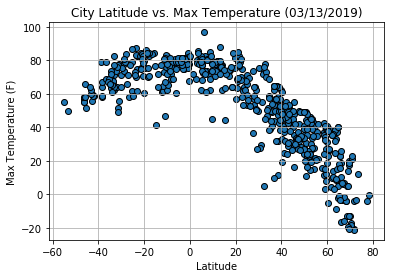

In [152]:
generic_plot('Lat','Max Temp')

#### Latitude vs. Humidity Plot

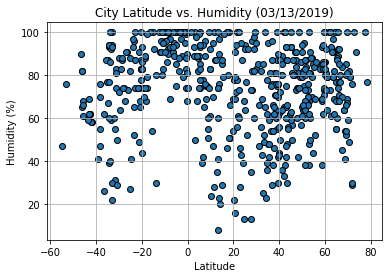

In [153]:
generic_plot('Lat','Humidity')

#### Latitude vs. Cloudiness Plot

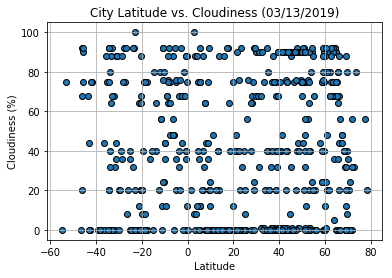

In [154]:
generic_plot('Lat','Cloudiness')

#### Latitude vs. Wind Speed Plot

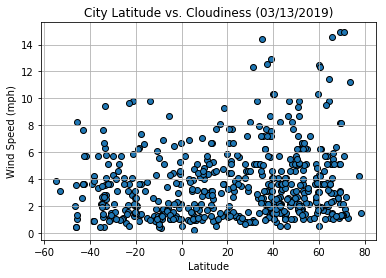

In [155]:
generic_plot('Lat','Wind Speed')